<a href="https://colab.research.google.com/github/abraamhossam/mindcare_app/blob/master/Copy_of_Graduation_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading data and preliminary analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
import random
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment', None)

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Graduation Project/Mental_Health_FAQ.csv",nrows=20)

In [ ]:
data.head()

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."


In [ ]:
# data preprocessing

for i in range(data.shape[0]):
  data['Answers'][i]=re.sub(r'\n', ' ',data['Answers'][i])
  data['Answers'][i]=re.sub('\(', '',data['Answers'][i])
  data['Answers'][i]=re.sub(r'\)', '',data['Answers'][i])
  data['Answers'][i]=re.sub(r',', '',data['Answers'][i])
  data['Answers'][i]=re.sub(r'-', '',data['Answers'][i])
  data['Answers'][i]=re.sub(r'/', '',data['Answers'][i])
  data['Answers'][i]=re.sub(r'/', '',data['Answers'][i])

In [ ]:
pairs=[]

for i in range(data.shape[0]):
  pairs.append(((data['Questions'][i]),data['Answers'][i]))

In [ ]:
pairs                                     # questions

[('What does it mean to have a mental illness?',
  'Mental illnesses are health conditions that disrupt a personâ€™s thoughts emotions relationships and daily functioning. They are associated with distress and diminished capacity to engage in the ordinary activities of daily life. Mental illnesses fall along a continuum of severity: some are fairly mild and only interfere with some aspects of life such as certain phobias. On the other end of the spectrum lie serious mental illnesses which result in major functional impairment and interference with daily life. These include such disorders as major depression schizophrenia and bipolar disorder and may require that the person receives care in a hospital. It is important to know that mental illnesses are medical conditions that have nothing to do with a personâ€™s character intelligence or willpower. Just as diabetes is a disorder of the pancreas mental illness is a medical condition due to the brainâ€™s biology. Similarly to how one would

## Data preprocessing

In [ ]:
input_docs = []
target_docs = []
input_tokens = set()
target_tokens = set()

for line in pairs:

  input_doc, target_doc = line[0], line[1]

  # Appending each input sentence to input_docs
  input_docs.append(input_doc)

  # Splitting words from punctuation
  target_doc = " ".join(re.findall(r"[\w']+|[^\s\w]", target_doc))

  # Redefine target_doc below and append it to target_docs
  target_doc = '<START> ' + target_doc + ' <END>'

  target_docs.append(target_doc)

  for token in re.findall(r"[\w']+|[^\s\w]", input_doc):
    if token not in input_tokens:
      input_tokens.add(token)
  for token in target_doc.split():
    if token not in target_tokens:
      target_tokens.add(token)

input_tokens = sorted(list(input_tokens))  # contains all words of input_docs
target_tokens = sorted(list(target_tokens))
num_encoder_tokens = len(input_tokens)
num_decoder_tokens = len(target_tokens)

In [ ]:
input_docs

['What does it mean to have a mental illness?',
 'Who does mental illness affect?',
 'What causes mental illness?',
 'What are some of the warning signs of mental illness?',
 'Can people with mental illness recover?',
 'What should I do if I know someone who appears to have the symptoms of a mental disorder?',
 'How can I find a mental health professional for myself or my child?',
 'What treatment options are available?',
 'If I become involved in treatment, what do I need to know?',
 'What is the difference between mental health professionals?',
 'How can I find a mental health professional right for my child or myself?',
 'If I become involved in treatment what do I need to know?',
 'Where else can I get help?',
 'What should I know before starting a new medication?',
 'If I feel better after taking medication, does this mean I am "cured" and can stop taking it?',
 'How can I get help paying for my medication?',
 'Where can I go to find therapy',
 'Where can I learn about types of me

In [ ]:
target_docs

['<START> Mental illnesses are health conditions that disrupt a personâ € ™ s thoughts emotions relationships and daily functioning . They are associated with distress and diminished capacity to engage in the ordinary activities of daily life . Mental illnesses fall along a continuum of severity : some are fairly mild and only interfere with some aspects of life such as certain phobias . On the other end of the spectrum lie serious mental illnesses which result in major functional impairment and interference with daily life . These include such disorders as major depression schizophrenia and bipolar disorder and may require that the person receives care in a hospital . It is important to know that mental illnesses are medical conditions that have nothing to do with a personâ € ™ s character intelligence or willpower . Just as diabetes is a disorder of the pancreas mental illness is a medical condition due to the brainâ € ™ s biology . Similarly to how one would treat diabetes with medi

In [ ]:
input_features_dict = dict([(token, i) for i, token in enumerate(input_tokens)])
target_features_dict = dict([(token, i) for i, token in enumerate(target_tokens)])

reverse_input_features_dict = dict((i, token) for token, i in input_features_dict.items())
reverse_target_features_dict = dict((i, token) for token, i in target_features_dict.items())

In [ ]:
input_features_dict

{'"': 0,
 ',': 1,
 '?': 2,
 'Can': 3,
 'How': 4,
 'I': 5,
 'If': 6,
 'What': 7,
 'Where': 8,
 'Who': 9,
 'a': 10,
 'about': 11,
 'affect': 12,
 'after': 13,
 'am': 14,
 'and': 15,
 'appears': 16,
 'are': 17,
 'available': 18,
 'become': 19,
 'before': 20,
 'better': 21,
 'between': 22,
 'can': 23,
 'causes': 24,
 'child': 25,
 'cured': 26,
 'difference': 27,
 'different': 28,
 'disorder': 29,
 'do': 30,
 'does': 31,
 'else': 32,
 'feel': 33,
 'find': 34,
 'for': 35,
 'get': 36,
 'go': 37,
 'group': 38,
 'have': 39,
 'health': 40,
 'help': 41,
 'if': 42,
 'illness': 43,
 'in': 44,
 'involved': 45,
 'is': 46,
 'it': 47,
 'know': 48,
 'learn': 49,
 'mean': 50,
 'medication': 51,
 'mental': 52,
 'my': 53,
 'myself': 54,
 'need': 55,
 'new': 56,
 'of': 57,
 'options': 58,
 'or': 59,
 'paying': 60,
 'people': 61,
 'professional': 62,
 'professionals': 63,
 'recover': 64,
 'right': 65,
 'should': 66,
 'signs': 67,
 'some': 68,
 'someone': 69,
 'starting': 70,
 'stop': 71,
 'support': 72,
 'sy

## Encoder - Decoder model

In [ ]:
max_encoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", input_doc)) for input_doc in input_docs])
max_decoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", target_doc)) for target_doc in target_docs])

encoder_input_data = np.zeros(
    (len(input_docs), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
for line, (input_doc, target_doc) in enumerate(zip(input_docs, target_docs)):
    for timestep, token in enumerate(re.findall(r"[\w']+|[^\s\w]", input_doc)):
        #Assign 1. for the current line, timestep, & word in encoder_input_data
        encoder_input_data[line, timestep, input_features_dict[token]] = 1.

    for timestep, token in enumerate(target_doc.split()):
        decoder_input_data[line, timestep, target_features_dict[token]] = 1.
        if timestep > 0:
            decoder_target_data[line, timestep - 1, target_features_dict[token]] = 1.

In [ ]:
encoder_input_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
decoder_target_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Training

In [ ]:
from tensorflow import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model
dimensionality = 256 # Dimensionality
batch_size = 10   # The batch size and number of epochs
epochs = 500

#Encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder_lstm = LSTM(dimensionality, return_state=True)
encoder_outputs, state_hidden, state_cell = encoder_lstm(encoder_inputs)
encoder_states = [state_hidden, state_cell]

#Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(dimensionality, return_sequences=True, return_state=True)
decoder_outputs, decoder_state_hidden, decoder_state_cell = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs) # Compiling

In [ ]:
training_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, None, 85)]           0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, None, 693)]          0         []                            
                                                                                                  
 lstm_2 (LSTM)               [(None, 256),                350208    ['input_7[0][0]']             
                              (None, 256),                                                        
                              (None, 256)]                                                        
                                                                                            

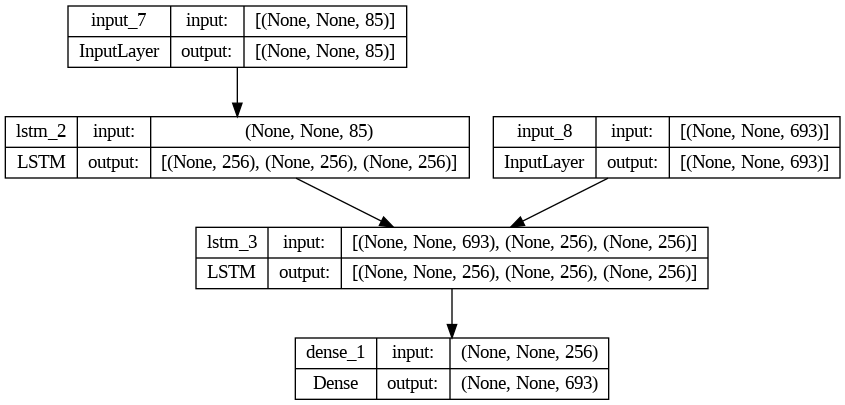

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Assuming 'training_model' is correctly defined
plot_model(training_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the generated model plot in the Colab notebook
Image('model_plot.png')


In [ ]:
training_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'], sample_weight_mode='temporal')#Training
history1=training_model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size = batch_size, epochs = epochs, validation_split = 0.2)
training_model.save('training_model.h5')

Epoch 1/500
2/2 [==============================] - 5s 2s/step - loss: 3.9033 - accuracy: 0.0976 - val_loss: 1.2200 - val_accuracy: 0.0080
Epoch 2/500
2/2 [==============================] - 0s 103ms/step - loss: 3.8980 - accuracy: 0.0186 - val_loss: 1.2187 - val_accuracy: 0.0090
Epoch 3/500
2/2 [==============================] - 0s 99ms/step - loss: 3.8935 - accuracy: 0.0218 - val_loss: 1.2172 - val_accuracy: 0.0090
Epoch 4/500
2/2 [==============================] - 0s 131ms/step - loss: 3.8884 - accuracy: 0.0246 - val_loss: 1.2153 - val_accuracy: 0.0100
Epoch 5/500
2/2 [==============================] - 0s 134ms/step - loss: 3.8798 - accuracy: 0.0236 - val_loss: 1.2101 - val_accuracy: 0.0100
Epoch 6/500
2/2 [==============================] - 0s 99ms/step - loss: 3.8442 - accuracy: 0.0236 - val_loss: 1.1680 - val_accuracy: 0.0100
Epoch 7/500
2/2 [==============================] - 0s 90ms/step - loss: 3.6575 - accuracy: 0.0236 - val_loss: 1.1206 - val_accuracy: 0.0100
Epoch 8/500
2/2 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


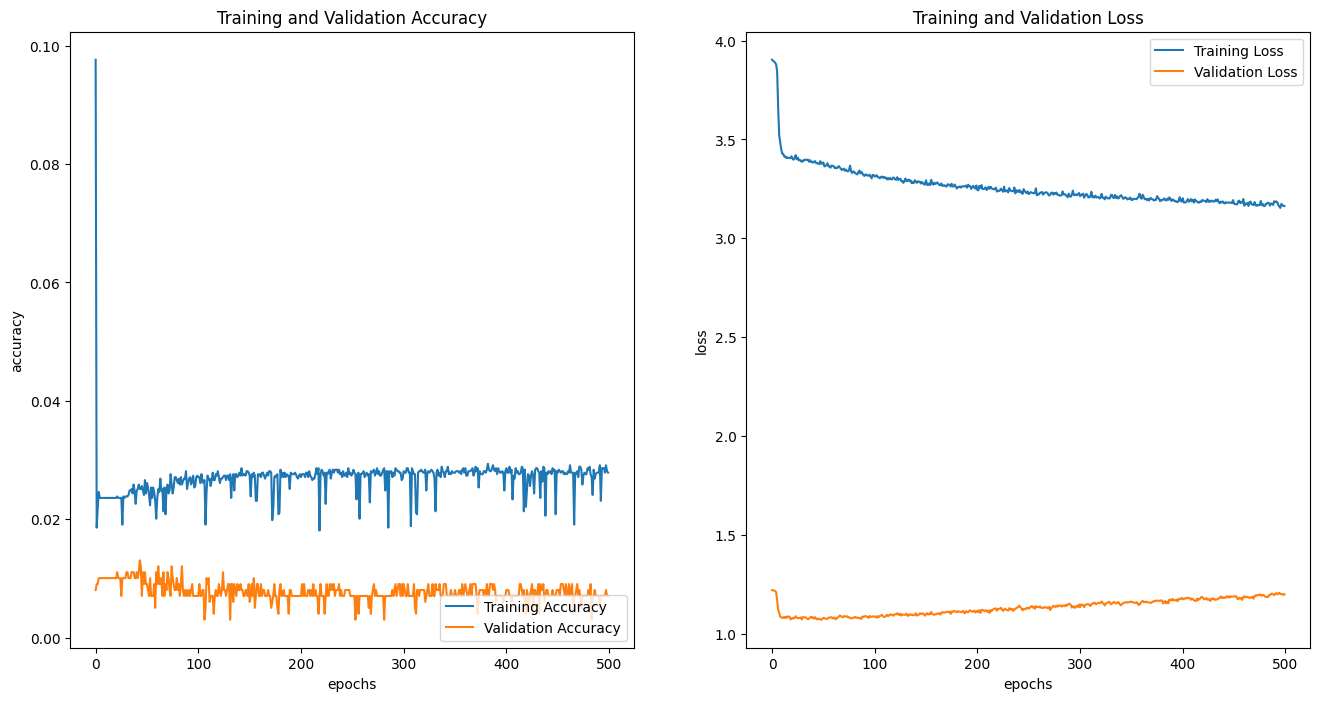

In [ ]:
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Predictions

In [ ]:
from keras.models import load_model
training_model = load_model('training_model.h5')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

In [ ]:
latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]

In [ ]:
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

In [ ]:
from keras.models import load_model
training_model = load_model('training_model.h5')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

def decode_response(test_input):
    #Getting the output states to pass into the decoder
    states_value = encoder_model.predict(test_input)

    #Generating empty target sequence of length 1
    target_seq = np.zeros((1, 1, num_decoder_tokens))

    #Setting the first token of target sequence with the start token
    target_seq[0, 0, target_features_dict['']] = 1.

    #A variable to store our response word by word
    decoded_sentence = ''

    stop_condition = False
    while not stop_condition:
          #Predicting output tokens with probabilities and states
          output_tokens, hidden_state, cell_state = decoder_model.predict([target_seq] + states_value)

          #Choosing the one with highest probability
          sampled_token_index = np.argmax(output_tokens[0, -1, :])
          sampled_token = reverse_target_features_dict[sampled_token_index]
          decoded_sentence += " " + sampled_token

          #Stop if hit max length or found the stop token
          if (sampled_token == '' or len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

          #Update the target sequence
          target_seq = np.zeros((1, 1, num_decoder_tokens))
          target_seq[0, 0, sampled_token_index] = 1.

          #Update states
          states_value = [hidden_state, cell_state]
    return decoded_sentence


In [ ]:
pip install openai==0.28

In [ ]:
from keras.models import load_model
import openai

# Load your trained model
trained_model = load_model('training_model.h5')

# Set your GPT-3 API key
openai.api_key = "api_key"

def query_trained_model(question):
    # Your existing decode_response function
    # This function takes the user query and uses your trained model to generate a response
    # Please ensure this function is properly defined in your environment
    # Here, I'm using a simplified version of your code
    # Replace it with your actual decode_response function
    def decode_response(test_input):
        # Your decoding logic here
        # Given 'test_input', interact with your trained model and get the response
        # Your implementation...

        return "Example response from your trained model"

    # Convert the user query to the format expected by your trained model
    # For example, you might need to preprocess it before passing it to the model
    input_data = preprocess_input(question)  # Replace this with your actual preprocessing steps

    # Call your trained model function to get the response
    model_response = decode_response(input_data)
    return model_response

def query_gpt3(question):
    # Call the GPT-3 API and get its response
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=question,
        max_tokens=100
    )
    return response.choices[0].text.strip()

def combine_responses(model_response, gpt3_response):
    # Your logic here to combine or select between the responses
    # For example, you might alternate between model_response and gpt3_response
    # Or, you can select one based on certain conditions
    return model_response, gpt3_response

def preprocess_input(input_text):
    # Your preprocessing steps to prepare the input for the model
    # Replace this with your actual preprocessing steps if needed
    return input_text

def get_combined_response(user_question):
    # Get responses from your model and GPT-3
    model_resp = query_trained_model(user_question)
    gpt3_resp = query_gpt3(user_question)

    # Combine or select between the responses
    final_response = combine_responses(model_resp, gpt3_resp)

    # Return the final response
    return final_response

# Example usage
user_question = "What is depression?"

# Get the combined response
combined_response = get_combined_response(user_question)

# Output the final response
print(combined_response)


('Example response from your trained model', 'Depression is a mental disorder characterized by persistent sadness, low mood, and a lack of interest or pleasure in activities. It may also cause physical symptoms such as fatigue, headaches, sleep problems, and changes in appetite. Depression can be caused by life events, trauma, or extreme stress as well as biological factors such as genetics and hormones. Longstanding, untreated depression can lead to other health problems and have a significant impact on quality of life.')


In [ ]:
import openai

class ChatBot:
    negative_responses = ("no", "nope", "nah", "naw", "not a chance", "sorry")
    exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")

    def __init__(self, api_key):
        openai.api_key = api_key

    def start_chat(self):
        user_response = input("Hi, I'm a chatbot  here to talk with you . AMA!\n")

        if user_response in self.negative_responses:
            print("Ok, have a great day!")
            return
        self.chat(user_response)

    def chat(self, reply):
        while not self.make_exit(reply):
            reply = input(self.generate_response(reply) + "\n")

    def generate_response(self, user_input):
        gpt3_response = openai.Completion.create(
            engine="text-davinci-003",
            prompt=user_input,
            max_tokens=50  # Define the length of the GPT-3 generated response
        )
        gpt3_text = gpt3_response.choices[0].text

        # Perform any required post-processing here before returning the combined response
        return gpt3_text

    def make_exit(self, reply):
        for exit_command in self.exit_commands:
            if exit_command in reply:
                print("Ok, have a great day!")
                return True
        return False

# Provide your GPT-3 API key here
api_key = "api_key"
chatbot = ChatBot(api_key)

In [ ]:
chatbot.start_chat()

Hi, I'm a chatbot  here to talk with you . AMA!
hi 


Hi there! How are you doing?
I'm feeling sad today


I'm sorry to hear that. It's okay to feel sad sometimes. Do you have any friends or family you can talk to? Or maybe some calming activities like going for a walk or listening to music that you can do to make yourself
i feel i'm depressed or sad but i don't  know the difference 


Depression and sadness are generally seen as different emotional states that can be experienced in various forms and intensities. Depression is a more severe and long-term form of sadness that can include feelings of guilt, worthlessness, hopelessness, and
what about ADHD?


ADHD stands for Attention Deficit Hyperactivity Disorder. It is a mental health disorder characterized by difficulty in paying attention, excessive impulsivity and hyperactivity. Treatment typically involves a combination of medication, psychotherapy, lifestyle changes and educational interventions.
i don't feel comfortable when i wa

DONE

